<a href="https://colab.research.google.com/github/hey-sid29/natural-language/blob/main/Exploring_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept of Similarity:

### What is Similarity? <br>
- Similarity is a mathematical technique of measuring the closeness of texts in vector space.

- Notebook contains the methods to compute similarities between two texts, that is used by a language model.

In [ ]:
#Setup
import numpy as np
import seaborn as sns
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!pip install cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.8/173.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
#setting up cohere client
import cohere
co = cohere.Client('<API-KEY-COHERE>')


In [ ]:
texts = [
    'I enjoy playing video games',
    'After studying i play video games',
    'Hydrogen has 3 isotopes'
]


In [ ]:
#Creating an embed matrix for the selected texts
response = co.embed(
   texts=texts,
   model='embed-english-v3.0',
   input_type='search_document'
)

In [ ]:
embeddings = response.embeddings

[embed1, embed2, embed3] = embeddings

print(f"Embeddings for sentence 1- {texts[0]}: {embed1}")
print(f"Embeddings for sentence 2- {texts[1]}: {embed2}")
print(f"Embeddings for sentence 3- {texts[2]}: {embed3}")

Embeddings for sentence 1- I enjoy playing video games: [0.014587402, 0.04434204, 0.003282547, -0.0027122498, -0.009971619, 0.0017757416, -0.018447876, -0.05923462, -0.019729614, 0.032836914, 0.037231445, -0.04147339, -0.025253296, -0.047912598, -0.002866745, -0.02003479, 0.0071754456, 0.007671356, -0.009544373, -0.017593384, -0.035705566, 0.0013866425, -0.022140503, -0.03945923, -0.0059661865, 0.075683594, -0.057128906, -0.015235901, -0.003730774, -0.014442444, -0.018173218, 0.017654419, 0.0385437, -0.06921387, 0.037963867, 0.039764404, 0.04309082, -0.06964111, -0.0154953, 0.025817871, 0.011253357, -0.021820068, -0.041046143, -0.04916382, -0.06719971, -0.014808655, 0.017318726, 0.014877319, 0.028656006, 0.001701355, 0.009605408, -0.014053345, 0.012268066, 0.023986816, -0.030761719, -0.013809204, -0.038146973, 0.04449463, 0.03277588, -0.024383545, -0.04244995, 0.009544373, 0.041412354, 0.014793396, -0.02079773, -0.013587952, 0.017700195, -0.0076179504, -0.04434204, -0.022033691, 0.0376

### Methods of calculating Similarities:<br>
a. Dot Product,<br>
b. Cosine Similarity

**a. DOT PRODUCT**

In [ ]:
print(f"Similarity between text-1 and text-2: {np.dot(embed1, embed2)}")
print(f"Similarity between text-1 and text-3: {np.dot(embed1, embed3)}")
print(f"Similarity between text-2 and text-3: {np.dot(embed2, embed3)}")

Similarity between text-1 and text-2: 0.7131490310602067
Similarity between text-1 and text-3: 0.3192599263713777
Similarity between text-2 and text-3: 0.31566025687743154


**b. COSINE SIMILARITY**

In [ ]:
print(f"Cosine Similarity between text-1 and text-2: {cosine_similarity([embed1], [embed2])[0][0]}")
print(f"Cosine Similarity between text-1 and text-3: {cosine_similarity([embed1], [embed3])[0][0]}")
print(f"Cosine Similarity between text-2 and text-3: {cosine_similarity([embed2], [embed3])[0][0]}")

Cosine Similarity between text-1 and text-2: 0.7130375629434281
Cosine Similarity between text-1 and text-3: 0.3193202335196279
Cosine Similarity between text-2 and text-3: 0.31572905608331686


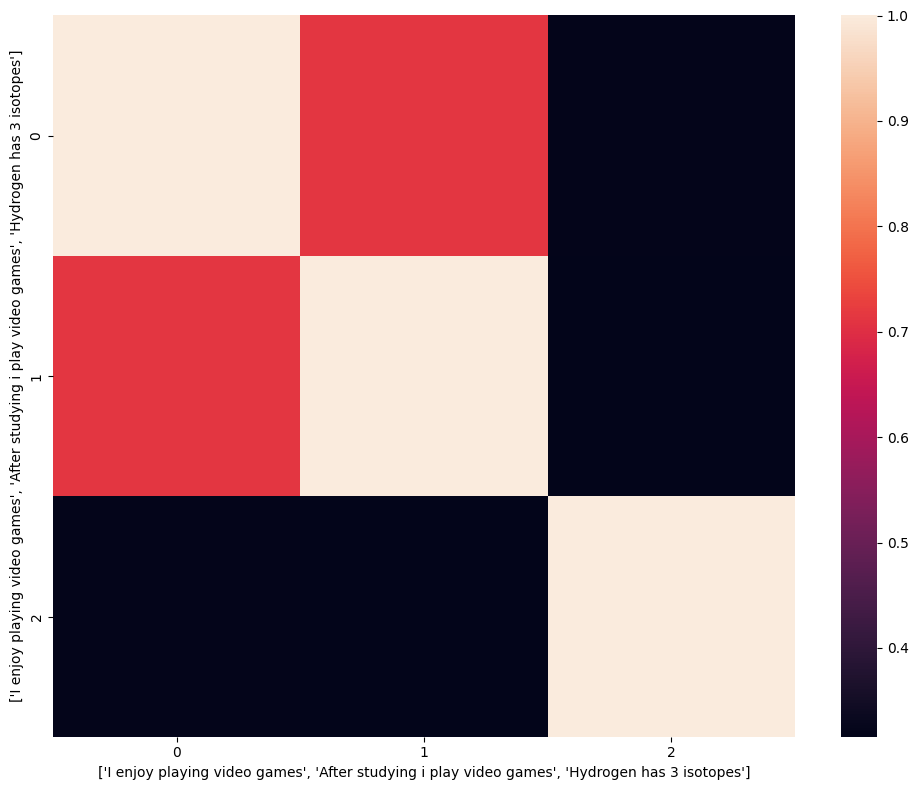

In [ ]:
#Creating a plot of similarity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot = sns.heatmap(cosine_similarity(embeddings))
plot.set(xlabel=texts, ylabel=texts)

plt.tight_layout()
plt.show()
